In [282]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import zipfile
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import os
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [253]:

# Here we load the images and do some preprocessing for them. We do the following preprocessing steps:
# - transform the into arrays
# - resize them to a smaller resolution
# - convert the image to B&W
# - Normalize the arrays

def transform_image(kuva):

    kuva = Image.open(kuva)
    new_size = (256, 256)

    resized_image = kuva.resize(new_size, Image.BILINEAR)

    kuva_array = tf.keras.preprocessing.image.img_to_array(resized_image)
    normalized_array = (kuva_array - kuva_array.min()) / (kuva_array.max() - kuva_array.min())
    type(normalized_array)
    return normalized_array


# Iterating through the folders to apply preprocessing for all images in the dataset 

def go_through_folder(folder):
    array_list =[]
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        array = transform_image(file_path)
        array_list.append(array)
        
    return array_list
        
#test_image = transform_image("output/train/benign/SOB_B_A-14-22549AB-400-001.png")   
benign_train = np.array(go_through_folder("output/train/benign"))
malignant_train = np.array(go_through_folder("output/train/malignant"))
benign_test = np.array(go_through_folder("output/test/benign"))
malignant_test = np.array(go_through_folder("output/test/malignant"))
benign_val = np.array(go_through_folder("output/val/benign"))
malignant_val = np.array(go_through_folder("output/val/malignant"))

benign_train[0]


array([[[0.46859902, 0.2705314 , 0.4830918 ],
        [0.5748792 , 0.35748792, 0.6038647 ],
        [0.6135266 , 0.4057971 , 0.6425121 ],
        ...,
        [0.8357488 , 0.5024155 , 0.5845411 ],
        [0.8647343 , 0.5362319 , 0.6183575 ],
        [0.84541065, 0.5458937 , 0.65700483]],

       [[0.41062802, 0.20289855, 0.4347826 ],
        [0.5362319 , 0.31400967, 0.5748792 ],
        [0.59903383, 0.38647342, 0.65217394],
        ...,
        [0.8405797 , 0.5024155 , 0.589372  ],
        [0.8695652 , 0.5362319 , 0.62801933],
        [0.84541065, 0.5458937 , 0.65700483]],

       [[0.4347826 , 0.22222222, 0.46859902],
        [0.5024155 , 0.2753623 , 0.5555556 ],
        [0.52657   , 0.31400967, 0.5942029 ],
        ...,
        [0.8405797 , 0.5024155 , 0.5942029 ],
        [0.8599034 , 0.5362319 , 0.62801933],
        [0.8405797 , 0.5458937 , 0.65700483]],

       ...,

       [[0.6956522 , 0.41545895, 0.57004833],
        [0.8019324 , 0.5072464 , 0.66183573],
        [0.84541065, 0

In [301]:
# Creating the Y labels for their respective images, 1 being a malignant tumor, 0 being a benign tumor
# Also preparing them to their respective train and test sets
benign_train_label = np.zeros(len(benign_train))
benign_test_label = np.zeros(len(benign_test))

malignant_train_label = np.ones(len(malignant_train))
malignant_test_label = np.ones(len(malignant_test))

malignant_val_label = np.ones(len(malignant_val))
benign_val_label = np.zeros(len(benign_val))

min_samples = min(len(benign_train), len(malignant_train))

if len(benign_train) > len(malignant_train):
    indices = np.random.choice(len(benign_train), min_samples, replace=False)  # Valitaan satunnaisesti indeksejä
    benign_train = benign_train[indices]
    benign_train_label = benign_train_label[indices]
else:
    indices = np.random.choice(len(malignant_train), min_samples, replace=False)  # Valitaan satunnaisesti indeksejä
    malignant_train = malignant_train[indices]
    malignant_train_label = malignant_train_label[indices]
    


    
print(len(benign_train), len(malignant_train))

X_train = np.concatenate((benign_train, malignant_train), axis = 0)
Y_train = np.concatenate((benign_train_label, malignant_train_label), axis = 0)


X_test = np.concatenate((benign_test, malignant_test), axis = 0)
Y_test = np.concatenate((benign_test_label, malignant_test_label), axis = 0)

X_val = np.concatenate((benign_val, malignant_val), axis = 0)
Y_val = np.concatenate((benign_val_label, malignant_val_label), axis = 0)


s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

s = np.arange(X_val.shape[0])
np.random.shuffle(s)
X_val = X_val[s]
Y_val = Y_val[s]


print(Y_test)


382 382
[1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]


In [303]:
datagen = ImageDataGenerator(
    rotation_range=15,            # Randomly rotate images by up to 15 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally (as a fraction of total width)
    height_shift_range=0.2,      # Randomly shift images vertically (as a fraction of total height)
    shear_range=0.2,             # Shear transformations
    zoom_range=0.2,              # Randomly zoom images
    horizontal_flip=True,        # Randomly flip images horizontally
    vertical_flip=False,         # Don't flip images vertically
    fill_mode='nearest'          # Strategy for filling in newly created pixels after transformations
)

datagen.fit(X_train)



In [304]:
# Creating the neural network

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_140 (Conv2D)         (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_129 (MaxPool  (None, 127, 127, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_141 (Conv2D)         (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_130 (MaxPool  (None, 62, 62, 128)       0         
 ing2D)                                                          
                                                                 
 conv2d_142 (Conv2D)         (None, 60, 60, 64)        73792     
                                                                 
 max_pooling2d_131 (MaxPool  (None, 30, 30, 64)      

In [305]:
print(X_train.shape)
optimizer = Adam(learning_rate = 0.00001)
model.compile(optimizer=optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(datagen.flow(X_train, Y_train), batch_size = 16, 
                    epochs=7,
                    validation_data=(X_val, Y_val))


(764, 256, 256, 3)
Epoch 1/7


2023-09-21 17:31:24.990459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.5497

2023-09-21 17:31:37.036116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 14s 512ms/step - loss: 0.6774 - accuracy: 0.5497 - val_loss: 0.6638 - val_accuracy: 0.5810
Epoch 2/7
24/24 [==============================] - 12s 478ms/step - loss: 0.6066 - accuracy: 0.7134 - val_loss: 0.6063 - val_accuracy: 0.6522
Epoch 3/7
24/24 [==============================] - 11s 472ms/step - loss: 0.5479 - accuracy: 0.7592 - val_loss: 0.5036 - val_accuracy: 0.7826
Epoch 4/7
24/24 [==============================] - 11s 464ms/step - loss: 0.5175 - accuracy: 0.7526 - val_loss: 0.4613 - val_accuracy: 0.8142
Epoch 5/7
24/24 [==============================] - 11s 464ms/step - loss: 0.5046 - accuracy: 0.7579 - val_loss: 0.5041 - val_accuracy: 0.7470
Epoch 6/7
24/24 [==============================] - 11s 462ms/step - loss: 0.4968 - accuracy: 0.7709 - val_loss: 0.4732 - val_accuracy: 0.7905
Epoch 7/7
24/24 [==============================] - 11s 466ms/step - loss: 0.4911 - accuracy: 0.7801 - val_loss: 0.4662 - val_accuracy: 0.7984


In [306]:
prediction = model.predict(X_test)

real_prediction = []
print(prediction)
for i in prediction:
    if i >= 0.5:
        i = 1
    else:
        i = 0
        
    real_prediction.append(i)

accuracy = accuracy_score(Y_test, real_prediction)
accuracy

1/8 [==>...........................] - ETA: 0s

2023-09-21 17:32:54.307388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 133ms/step
[[0.963967  ]
 [0.5693094 ]
 [0.7442902 ]
 [0.6225769 ]
 [0.92698294]
 [0.95209473]
 [0.24532542]
 [0.13901769]
 [0.19424084]
 [0.6490929 ]
 [0.8722891 ]
 [0.65041107]
 [0.13557956]
 [0.6896205 ]
 [0.82268876]
 [0.9795839 ]
 [0.15369758]
 [0.94312084]
 [0.38565657]
 [0.96165085]
 [0.76179284]
 [0.9546513 ]
 [0.23129372]
 [0.07410045]
 [0.8354126 ]
 [0.25155145]
 [0.90362185]
 [0.21142845]
 [0.45199335]
 [0.9666755 ]
 [0.80974007]
 [0.62449616]
 [0.90599376]
 [0.8411617 ]
 [0.71615314]
 [0.4092384 ]
 [0.5713923 ]
 [0.59942746]
 [0.59868705]
 [0.5654583 ]
 [0.7039947 ]
 [0.71852916]
 [0.07762089]
 [0.6883649 ]
 [0.6896205 ]
 [0.22761439]
 [0.59628344]
 [0.7658338 ]
 [0.94909066]
 [0.8906302 ]
 [0.48648733]
 [0.7037988 ]
 [0.91253716]
 [0.5910822 ]
 [0.49392298]
 [0.1624104 ]
 [0.9558348 ]
 [0.17013155]
 [0.30785954]
 [0.74731463]
 [0.9595958 ]
 [0.75983745]
 [0.71027946]
 [0.704073  ]
 [0.0531107 ]
 [0.93681484]
 [0.6302906 ]
 [0.28394

0.81640625

8/8 - 1s - loss: 0.4538 - accuracy: 0.8164 - 1s/epoch - 138ms/step


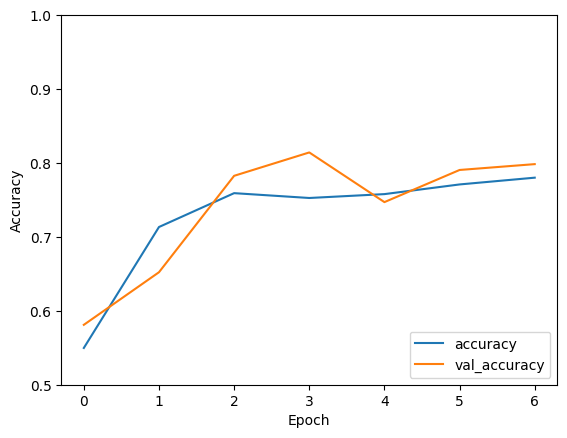

In [307]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

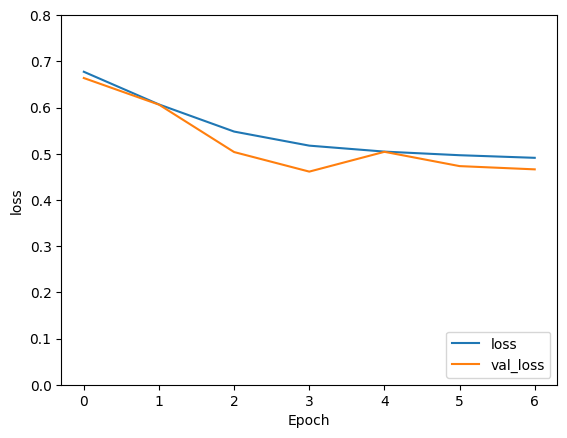

In [310]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.ylim([0, 0.8
         ])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

